# Advanced Rice Grain Classification Using Convolutional Neural Networks in TensorFlow

## Business Understanding

### Abstract

Rice has many genetic varieties and one of the most produced grain worldwide. These varieties are differentiated from each other by some of their features which include, shape, colour and texture.These features will enable to distinguish, classify and evaluate the quality of seeds. In this study, Arborio, Ipsala, Jasmine, Karcadag and Basmati are the five varieties found and grown in Turkey that will be used.The primary objective of this project is to develop a convolutional neural network (CNN) model that can accurately classify different types of rice grains from the images. This problem addresses the need for automated quality control in the agriculture and food processing industries. With the rapid advancements in technology, there is a growing demand for efficient and accurate methods to classify agricultural products. Traditional methods are labour-intensive, time-consuming, and prone to human error. By leveraging CNNs, this project aims to automate the classification process, enhancing both efficiency and accuracy.

### Motivation

Ensuring the quality and type of rice is crucial for both farmers and consumers. High-quality rice ensures consumer satisfaction and adherence to market standards. Automating the classification process can significantly reduce labor costs and increase efficiency and accuracy. This topic is important for enhancing food security and quality control in the agricultural domain. Automated classification systems can also assist in identifying potential quality issues early in the supply chain, preventing large-scale distribution of substandard products.

### Industry/Application Domain

This project is applicable to the agriculture and food processing industries, specifically in the domain of quality control and inventory management. Accurate classification of rice types is essential for pricing, packaging, and distribution. Food processing companies can benefit from automated systems that ensure consistent quality and reduce the likelihood of human error. Additionally, such systems can be integrated into existing quality control processes, providing real-time feedback and analysis.

### Target Audience

The primary audience includes agricultural scientists, food processing companies, quality control personnel, and researchers in the field of computer vision and machine learning. Agricultural policymakers and educators can also benefit from understanding the impact of advanced technologies in improving agricultural practices.

### Data Collection

The dataset is obtained from Kaggle website
https://www.kaggle.com/code/karladriandeguzman/99-9-rice-image-classification-using-cnn-in-tf/notebook.
It contains five rice varieties with 75,000 images. 

### Data Processing

**Importing Libraries**

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import os
import cv2
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import datetime

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


**Loading and Exploring data Set**

**Data Loading**

In [3]:
dataset_path = r"C:/Users/bmaruru/Downloads/rice_data/Rice_Image_Dataset"


**Exploring directory structure**

In [11]:
categories = os.listdir(dataset_path)
print(categories)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


**image count for each category**

In [13]:
category_counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in categories}
print(category_counts)


{'Arborio': 15000, 'Basmati': 15000, 'Ipsala': 15000, 'Jasmine': 15000, 'Karacadag': 15000}


**Visualizing Category Distribution**

C:\Users\bmaruru\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bmaruru\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bmaruru\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\bmaruru\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

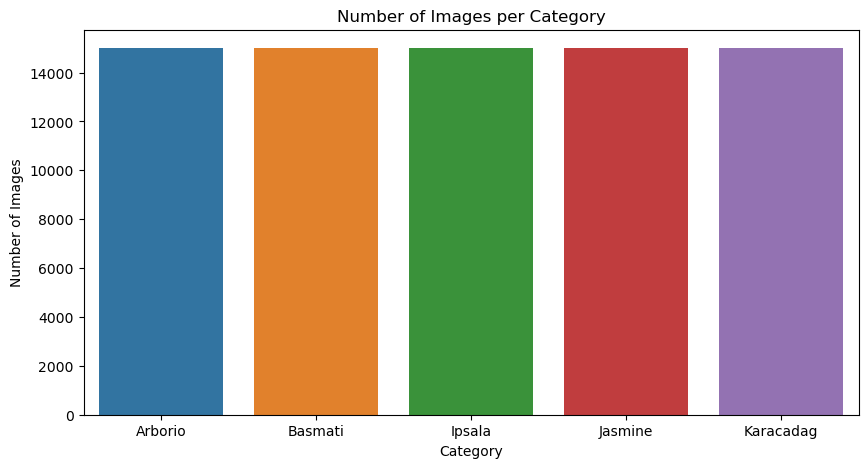

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()


**Visualize Sample Images**


**Visualize Random Images from Each Category**

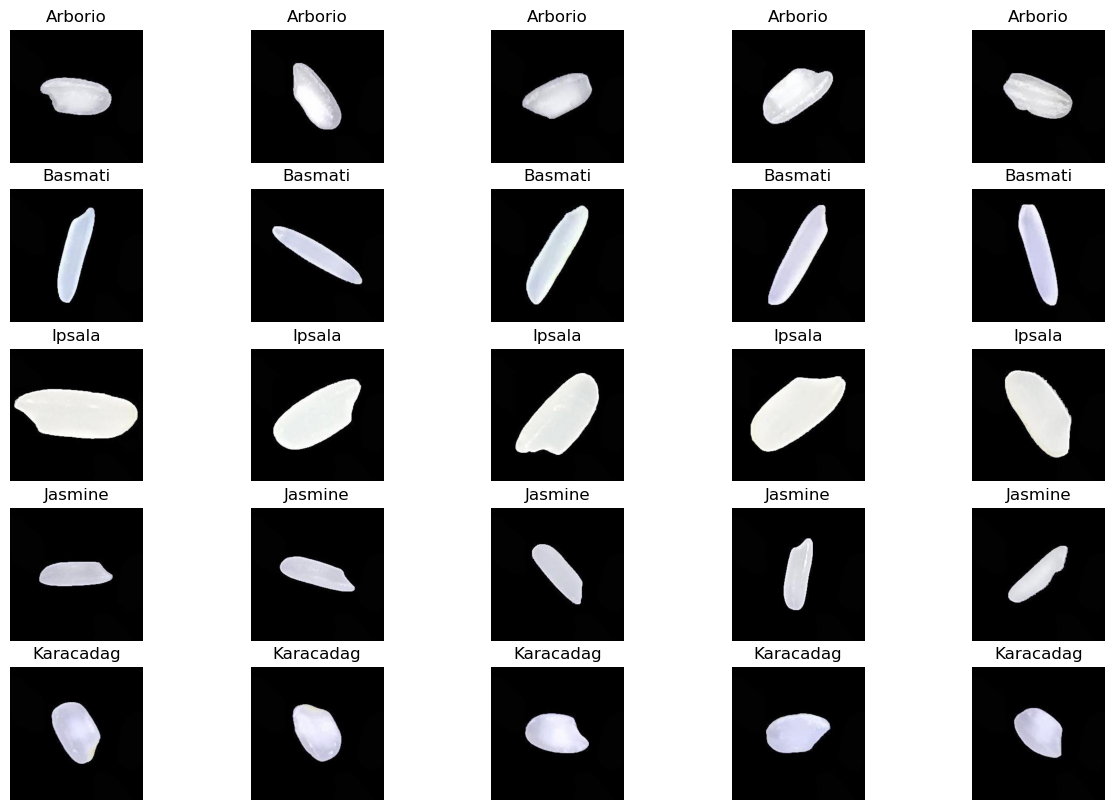

In [15]:
def visualize_sample_images(dataset_path, categories, num_images=5):
    plt.figure(figsize=(15, 10))
    for i, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        images = os.listdir(category_path)
        for j in range(num_images):
            img = Image.open(os.path.join(category_path, images[j]))
            plt.subplot(len(categories), num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.title(category)
            plt.axis('off')
    plt.show()

visualize_sample_images(dataset_path, categories)


**Analyze Image Properties**

In [16]:
#Loading a sample of the images

def load_images(dataset_path, categories, num_images=100):
    data = []
    labels = []
    for category in categories:
        category_path = os.path.join(dataset_path, category)
        images = os.listdir(category_path)[:num_images]
        for img_name in images:
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            data.append(img)
            labels.append(category)
    return np.array(data), np.array(labels)

data, labels = load_images(dataset_path, categories)

**Analyze image Dimensions**

In [18]:
image_shapes = [img.shape for img in data]
df_shapes = pd.DataFrame(image_shapes, columns=['Height', 'Width', 'Channels'])
print(df_shapes.describe())


       Height  Width  Channels
count   500.0  500.0     500.0
mean    250.0  250.0       3.0
std       0.0    0.0       0.0
min     250.0  250.0       3.0
25%     250.0  250.0       3.0
50%     250.0  250.0       3.0
75%     250.0  250.0       3.0
max     250.0  250.0       3.0


**Visualizing image Dimensions**

C:\Users\bmaruru\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bmaruru\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bmaruru\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bmaruru\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

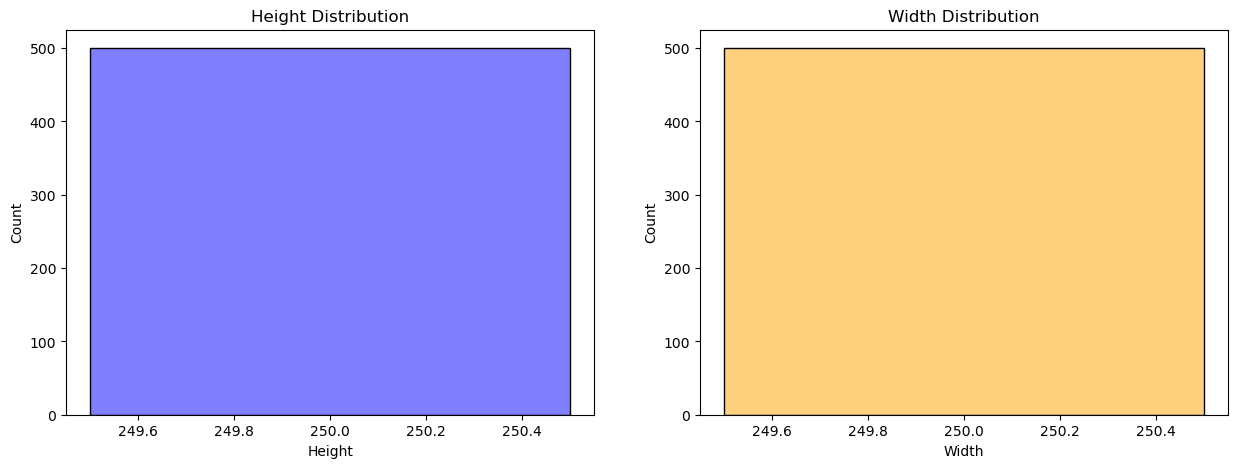

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df_shapes['Height'], kde=True, ax=axs[0], color='blue')
axs[0].set_title('Height Distribution')

sns.histplot(df_shapes['Width'], kde=True, ax=axs[1], color='orange')
axs[1].set_title('Width Distribution')

plt.show()


In [10]:
# Generate the features and store them in a csv file.
# def calculate_features(image):
#     features = {}
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     # Basic shape features
#     labeled_img = measure.label(gray_image > 0)
#     region_props = measure.regionprops(labeled_img)
    
#     if region_props:
#         region = region_props[0]
#         features['AREA'] = region.area
#         features['PERIMETER'] = region.perimeter
#         features['MAJOR_AXIS'] = region.major_axis_length
#         features['MINOR_AXIS'] = region.minor_axis_length
#         features['ECCENTRICITY'] = region.eccentricity
#         features['EQDIASQ'] = np.sqrt(4 * region.area / np.pi)
#         features['SOLIDITY'] = region.solidity
#         features['CONVEX_AREA'] = region.convex_area
#         features['EXTENT'] = region.extent
#         features['ASPECT_RATIO'] = region.major_axis_length / region.minor_axis_length if region.minor_axis_length != 0 else 0
#         features['ROUNDNESS'] = 4 * np.pi * region.area / (region.perimeter ** 2) if region.perimeter != 0 else 0
#         features['COMPACTNESS'] = region.area / (region.perimeter ** 2) if region.perimeter != 0 else 0

#     # Color features
#     for color_space, conversion in [('RGB', cv2.COLOR_BGR2RGB), ('HSV', cv2.COLOR_BGR2HSV), ('LAB', cv2.COLOR_BGR2LAB)]:
#         img_conv = cv2.cvtColor(image, conversion)
#         for i, col in enumerate(['R', 'G', 'B'] if color_space == 'RGB' else ['H', 'S', 'V'] if color_space == 'HSV' else ['L', 'A', 'B']):
#             channel = img_conv[:, :, i].flatten()
#             features[f'mean{color_space}{col}'] = np.mean(channel)
#             features[f'StdDev{color_space}{col}'] = np.std(channel)
#             features[f'skew{color_space}{col}'] = skew(channel)
#             features[f'kurtosis{color_space}{col}'] = kurtosis(channel)
#             features[f'entropy{color_space}{col}'] = entropy(channel)

#     return features

# # Calculate features for all images
# features_list = []
# for image in images:
#     features = calculate_features(image)
#     features_list.append(features)

# # Create DataFrame
# df = pd.DataFrame(features_list)
# df['CLASS'] = labels

# df.to_csv("image_features.csv", index=False)


In [20]:
df = pd.read_csv('image_features.csv')

In [21]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,StdDevLABA,skewLABA,kurtosisLABA,entropyLABA,meanLABB,StdDevLABB,skewLABB,kurtosisLABB,entropyLABB,CLASS
0,7.0,5.0,8.0,0.0,1.0,2.985411,1.0,7.0,1.0,0.0,...,0.522094,3.101069,10.814786,10.823284,127.535375,1.255482,-2.696587,6.604742,10.823243,Arborio
1,7.0,5.0,8.0,0.0,1.0,2.985411,1.0,7.0,1.0,0.0,...,0.604705,3.555362,12.482332,10.823281,127.631936,1.192312,-3.345385,10.772596,10.823248,Arborio
2,7.0,5.0,8.0,0.0,1.0,2.985411,1.0,7.0,1.0,0.0,...,0.512400,3.141947,10.979176,10.823284,127.534977,1.277571,-2.776617,7.012515,10.823241,Arborio
3,7.0,5.0,8.0,0.0,1.0,2.985411,1.0,7.0,1.0,0.0,...,0.364591,3.921327,24.819174,10.823288,127.707908,0.842688,-3.390172,12.617285,10.823270,Arborio
4,7.0,5.0,8.0,0.0,1.0,2.985411,1.0,7.0,1.0,0.0,...,0.258704,5.828338,48.568412,10.823290,127.827667,0.572280,-4.101415,23.262259,10.823282,Arborio


In [22]:
df.tail()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,StdDevLABA,skewLABA,kurtosisLABA,entropyLABA,meanLABB,StdDevLABB,skewLABB,kurtosisLABB,entropyLABB,CLASS
74995,7.0,5.0,8.0,0.0,1.0,2.985411,1.0,7.0,1.0,0.0,...,1.578554,2.935338,7.500106,10.823218,126.827906,3.503349,-2.861655,6.687117,10.822900,Karacadag
74996,7.0,5.0,8.0,0.0,1.0,2.985411,1.0,7.0,1.0,0.0,...,1.200550,3.257376,9.585923,10.823249,127.015924,3.212333,-3.242121,9.153377,10.822963,Karacadag
74997,7.0,5.0,8.0,0.0,1.0,2.985411,1.0,7.0,1.0,0.0,...,1.742373,2.807569,6.527985,10.823201,126.638652,4.000711,-2.786121,6.175747,10.822778,Karacadag
74998,7.0,5.0,8.0,0.0,1.0,2.985411,1.0,7.0,1.0,0.0,...,1.144384,2.951134,7.478304,10.823253,127.066346,2.821761,-2.906289,6.853389,10.823040,Karacadag
74999,7.0,5.0,8.0,0.0,1.0,2.985411,1.0,7.0,1.0,0.0,...,1.071136,1.901071,10.804942,10.823257,127.168068,2.747657,-2.254211,7.818424,10.823055,Karacadag


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,75000.0,7.467133,89.619195,1.000000,7.000000,7.000000,7.000000,17437.000000
PERIMETER,75000.0,5.030598,5.183673,0.000000,5.000000,5.000000,5.000000,1021.092496
MAJOR_AXIS,75000.0,8.005846,1.134999,0.000000,8.000000,8.000000,8.000000,226.907969
MINOR_AXIS,75000.0,0.003552,0.516731,0.000000,0.000000,0.000000,0.000000,100.483488
ECCENTRICITY,75000.0,0.999895,0.008805,0.000000,1.000000,1.000000,1.000000,1.000000
EQDIASQ,75000.0,2.989801,0.754020,1.128379,2.985411,2.985411,2.985411,149.001604
SOLIDITY,75000.0,0.999981,0.001840,0.733333,1.000000,1.000000,1.000000,1.000000
CONVEX_AREA,75000.0,7.500707,96.023995,1.000000,7.000000,7.000000,7.000000,18868.000000
EXTENT,75000.0,0.999946,0.003717,0.550000,1.000000,1.000000,1.000000,1.000000
ASPECT_RATIO,75000.0,0.001576,0.100859,0.000000,0.000000,0.000000,0.000000,9.552814


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          75000 non-null  float64
 1   PERIMETER     75000 non-null  float64
 2   MAJOR_AXIS    75000 non-null  float64
 3   MINOR_AXIS    75000 non-null  float64
 4   ECCENTRICITY  75000 non-null  float64
 5   EQDIASQ       75000 non-null  float64
 6   SOLIDITY      75000 non-null  float64
 7   CONVEX_AREA   75000 non-null  float64
 8   EXTENT        75000 non-null  float64
 9   ASPECT_RATIO  75000 non-null  float64
 10  ROUNDNESS     75000 non-null  float64
 11  COMPACTNESS   75000 non-null  float64
 12  meanRGBR      75000 non-null  float64
 13  StdDevRGBR    75000 non-null  float64
 14  skewRGBR      75000 non-null  float64
 15  kurtosisRGBR  75000 non-null  float64
 16  entropyRGBR   75000 non-null  float64
 17  meanRGBG      75000 non-null  float64
 18  StdDevRGBG    75000 non-nu

In [16]:
df.shape

(75000, 58)

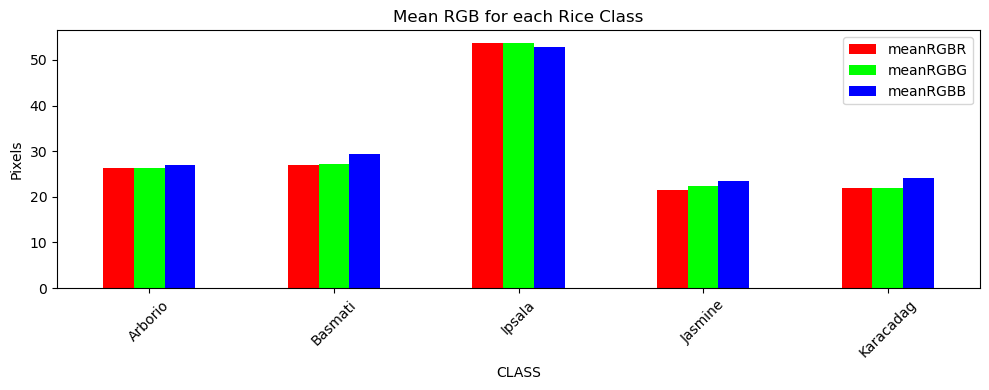

In [24]:
# average intensity of the specific colour in the RGB for the various rice classes
mean_columns_RGB=[]
columns = df.columns
for c in columns:
    if c.startswith('meanRGB'):
        mean_columns_RGB.append(c)
    else:
        pass   
mean_columns_RGB.append('CLASS')  
mean_columns_RGB

class_colors = ['#FF0000', '#00FF00', '#0000FF'] 

plt.figure(figsize=(10, 4))
ax=plt.subplot()
df[mean_columns_RGB].groupby('CLASS').mean().plot(kind='bar', ax=ax, color=class_colors)
ax.set_title('Mean RGB for each Rice Class')
ax.set_ylabel('Pixels')
plt.xticks(rotation=45)
plt.tight_layout();

ispala has a higer colour intensity as compared to the other rice classes. 

The average intensity of the three colour is almost the same in the different rice classes. 

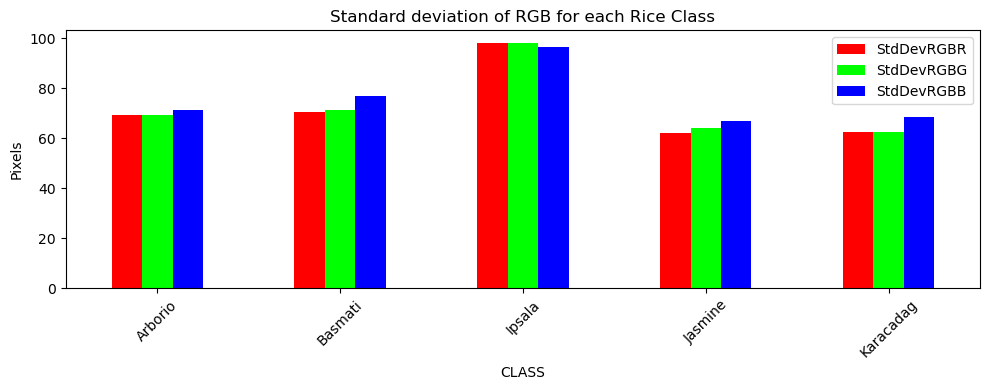

In [25]:
# variation of the specific colour from the mean in the RGB for the various rice classes
columns_RGB=[]
for c in columns:
    if c.startswith('StdDevR'):
        columns_RGB.append(c)
    else:
        pass   
columns_RGB.append('CLASS')  
columns_RGB


plt.figure(figsize=(10, 4))
ax=plt.subplot()
df[columns_RGB].groupby('CLASS').mean().plot(kind='bar', ax=ax, color=class_colors)
ax.set_title('Standard deviation of RGB for each Rice Class')
ax.set_ylabel('Pixels')
plt.xticks(rotation=45)
plt.tight_layout();

There is high standard deviation (above 60) in all RGB channels for the different rice, this indicates significant color variation and contrast throughout the images.

Ipsala has a higher color variation for all RGB channels as compared to the other rice types.

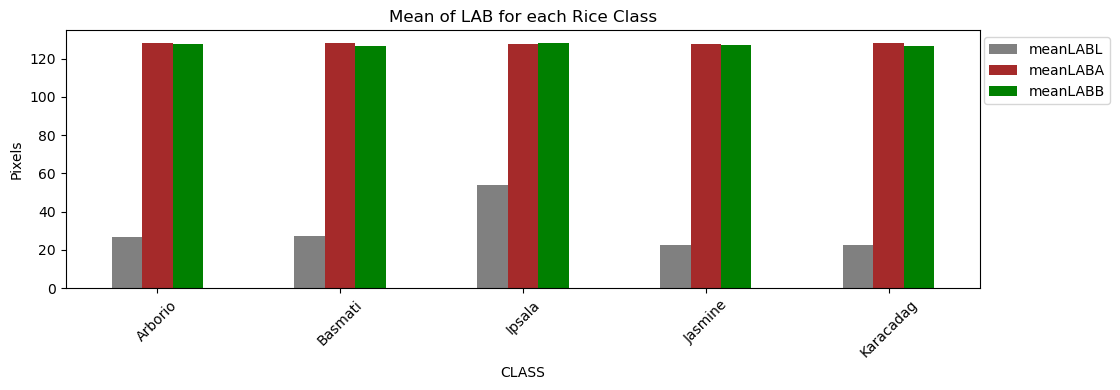

In [26]:
columns_LAB=[]
for c in columns:
    if c.startswith('meanLAB'):
        columns_LAB.append(c)
    else:
        pass   
columns_LAB.append('CLASS')  
columns_LAB
channel_colors = {'meanLABL': 'gray', 'meanLABA': 'brown', 'meanLABB': 'green'}

plt.figure(figsize=(10, 4))
ax=plt.subplot()
df[columns_LAB].groupby('CLASS').mean().plot(kind='bar', ax=ax, color=channel_colors)
ax.set_title('Mean of LAB for each Rice Class')
ax.set_ylabel('Pixels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1));

All classes of rice generally have have a dark color with the lighest being ipsala as indicated by the small values of the LABL which measures the lightness of color.

All rice grains have reddish hues as indicated by the positive values of the LABA which measures the color component from green to red.

All rice grains have yellowish hues as indicated by the positive values of the LABB which measures the color component from blue to yellow.

In [27]:
df.groupby('CLASS')['ECCENTRICITY'].mean()

CLASS
Arborio      1.000000
Basmati      0.999602
Ipsala       0.999986
Jasmine      0.999886
Karacadag    1.000000
Name: ECCENTRICITY, dtype: float64

Eccentricity is a measure of how elongated an object is with a scale of 0-1 with zero being circular and 1 being elongated, all rice classes are elongated as they have a value that is one or close to one.

## IMAGE PREPROCESSING

**Resizing the Images**

In [47]:
def load_images(dataset_path, categories, num_images=15000):
    data = []
    labels = []
    for category in categories:
        category_path = os.path.join(dataset_path, category)
        images = os.listdir(category_path)[:num_images]
        for img_name in images:
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            data.append(img)
            labels.append(category)
    return np.array(data), np.array(labels)

data, labels = load_images(dataset_path, categories)

target_size = (128, 128)

def preprocess_images(data, target_size):
    data_resized = [cv2.resize(img, target_size) for img in data]
    return np.array(data_resized)

data = preprocess_images(data, target_size)


print(f"Resized data shape: {data.shape}")



Resized data shape: (75000, 128, 128, 3)


In [53]:
import numpy as np
import random
import cv2

# Augmentation functions
def add_noise(image, mean=0, std=25):
    gauss = np.random.normal(mean, std, image.shape).astype('float32')
    noisy = np.clip(image + gauss, 0, 255).astype('uint8')
    return noisy

def crop_image(image, start_x, start_y, width, height):
    end_x = min(start_x + width, image.shape[1])
    end_y = min(start_y + height, image.shape[0])
    return image[start_y:end_y, start_x:end_x]

def blur_image(image, ksize):
    if ksize % 2 == 0:  # Ensure kernel size is odd
        ksize += 1
    if len(image.shape) < 3 or image.shape[0] == 0 or image.shape[1] == 0:
        raise ValueError("Input image is not a valid image")
    return cv2.GaussianBlur(image, (ksize, ksize), 0)

def augment_image(image):
    aug_images = []
    aug_images.append(add_noise(image))
    aug_images.append(crop_image(image, 10, 10, image.shape[1] - 20, image.shape[0] - 20))  # Example crop
    aug_images.append(blur_image(image, 5))
    return aug_images

def resize_image(image, size=(128, 128)):
    return cv2.resize(image, size)

# Categories
categories = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Store augmented images and labels
augmented_data = []
augmented_labels = []

# Process and augment images
for category in categories:
    category_indices = np.where(labels == category)[0]
    num_images_to_augment = 1500
    
    if len(category_indices) > 0:
        images_to_augment = random.sample(list(category_indices), min(num_images_to_augment, len(category_indices)))
        
        for idx in images_to_augment:
            image = data[idx]
            image = resize_image(image, size=(128, 128))  # Resize image to 128x128
            augmented_images = augment_image(image)
            for aug_image in augmented_images:
                aug_image = resize_image(aug_image, size=(128, 128))  # Ensure all augmented images are 128x128
                augmented_data.append(aug_image)
                augmented_labels.append(category)

# Convert augmented data and labels to numpy arrays
augmented_data = np.array(augmented_data, dtype='uint8')
augmented_labels = np.array(augmented_labels)

print("Augmentation completed and images stored in variables.")


Augmentation completed and images stored in variables.


In [54]:
augmented_data.shape

(22500, 128, 128, 3)

In [55]:
# Merge the original and augmented datasets
combined_data = np.concatenate((data, augmented_data), axis=0)
combined_labels = np.concatenate((labels, augmented_labels), axis=0)

print("Original data shape:", data.shape)
print("Augmented data shape:", augmented_data.shape)
print("Combined data shape:", combined_data.shape)

Original data shape: (75000, 128, 128, 3)
Augmented data shape: (22500, 128, 128, 3)
Combined data shape: (97500, 128, 128, 3)
